<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Шаг-1.-Загрузка-данных" data-toc-modified-id="Шаг-1.-Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Шаг 1. Загрузка данных</a></span></li><li><span><a href="#Шаг-2.-Предобработка-данных" data-toc-modified-id="Шаг-2.-Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Шаг 2. Предобработка данных</a></span></li><li><span><a href="#Шаг-3.-Исследовательский-анализ-данных" data-toc-modified-id="Шаг-3.-Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Шаг 3. Исследовательский анализ данных</a></span></li><li><span><a href="#Шаг-4.-Объединение-данных" data-toc-modified-id="Шаг-4.-Объединение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Шаг 4. Объединение данных</a></span></li><li><span><a href="#Шаг-5.-Подсчёт-выручки" data-toc-modified-id="Шаг-5.-Подсчёт-выручки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Шаг 5. Подсчёт выручки</a></span></li><li><span><a href="#Шаг-6.-Проверка-гипотез" data-toc-modified-id="Шаг-6.-Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Шаг 6. Проверка гипотез</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Проект по Статистическому анализу данных.  Сервис аренды самокатов GoFast

Проанализируем сервис аренды самокатов **GoFast**.       
Получили данные о некоторых пользователях из нескольких городов, а также об их поездках.   
Необходимо проанализировать данные и провереть некоторые гипотезы, которые могут помочь бизнесу вырасти.  
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.   
Сервисом можно пользоваться:
1. без подписки:   
    1.1. абонентская плата отсутствует;  
    1.2. стоимость одной минуты поездки — 8 рублей;  
    1.3.стоимость старта (начала поездки) — 50 рублей;  
2. с подпиской Ultra:  
    2.1.абонентская плата — 199 рублей в месяц;  
    2.2.стоимость одной минуты поездки — 6 рублей;  
    2.3.стоимость старта — бесплатно.  

#### Шаг 1. Загрузка данных

**1.1.Загрузка данных**  
На данном этапе загрузили три файла csv формата

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from scipy import stats as st
#загрузили библиотеки которые понадобятся

In [2]:
try:
    users = pd.read_csv('C:\\Users\\DILYA\\Downloads\\Practicum\\data\\stat\\users_go.csv')
except:
    users = pd.read_csv('https://code.s3.yandex.net//datasets/users_go.csv')
#данные о пользователях

try:
    rides = pd.read_csv('C:\\Users\\DILYA\\Downloads\\Practicum\\data\\stat\\rides_go.csv')
except:
    rides = pd.read_csv('https://code.s3.yandex.net//datasets/rides_go.csv')
#данные о поездках

try:
    subscriptions = pd.read_csv('C:\\Users\\DILYA\\Downloads\\Practicum\\data\\stat\\subscriptions_go.csv')
except:
    subscriptions = pd.read_csv('https://code.s3.yandex.net//datasets/subscriptions_go.csv')
#данные о типах подписок


**1.2 Выведим первые строки каждого набора данных. Изучим общую информацию о каждом датафрейме**

Датафрейм о Пользователях (USERS)

In [3]:
users.head(5)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
print(f"Объем данных 'users': {users.shape}")

Объем данных 'users': (1565, 5)


 Датафрейм 'users' содержится 1534 строки и 6 столбцов, файл весит 61,3 кб.  
 Описание столбцов датафрейма:    
**user_id** -	уникальный идентификатор пользователя  
**name**	- имя пользователя  
**age**	- возраст  
**city**	- город  
**subscription_type**	- тип подписки (free, ultra)    

Из названий стоблцов ясно, что здесь собраны данные о пользователях аренды самокатов GoFast.  
user_id и age имеют тип данных int64, что означает, что это целочисленные значения.
name и city,subscription_typ  имеют тип данных object, что обычно указывает на строки (текстовые данные).
В целом тип данных корректен

Датафрейм о Поездках (RIDES)

In [6]:
rides.head(5)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [7]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [8]:
print(f"Объем данных 'rides': {rides.shape}")

Объем данных 'rides': (18068, 4)


 Датафрейм содержит 18 068 строк, 5 колонок, файл весит 564,8 кб.  
 Описание столбцов датафрейма:   
**user_id**	- уникальный идентификатор пользователя  
**distance**	- расстояние, которое пользователь проехал в текущей сессии (в метрах)  
**duration** - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до   момента, как он нажал кнопку «Завершить поездку»  
**date**	- дата совершения поездки    
В данном датафрейме указаны уже поездки по датам и пользователям с указанием продолжительности и дистанции.
При этом формат дат указан в типе object (в дальнейшем поменяем)    

float64 имеют столбцы distance и  duration здесь все верно т.к используется числа с плавающей запятой для точности

Датафрейм Подписок (subscriptions)

In [9]:
subscriptions.head(5)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [11]:
print(f"Объем данных 'subscriptions': {subscriptions.shape}")

Объем данных 'subscriptions': (2, 4)


Датафрейм содержит 2 строки, 4 колонки, файл весит 192 б.  
Описание столбцов датафрейма:
**subscription_type**	- тип подписки  
**minute_price**	- стоимость одной минуты поездки по данной подписке  
**start_ride_price**	- стоимость начала поездки  
**subscription_fee**	- стоимость ежемесячного платежа  
В данном датфрейме общая инфорамция по условиям подписки.

#### Шаг 2. Предобработка данных

**2.1 Приведем столбец date к типу даты pandas.**  
Как указывалось выше в датафрейме rides формат даты указан как object меняем на date.

In [12]:
rides['date'] = pd.to_datetime(rides['date']) #меняем формат
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


**2.2 Создание нового столбца с номером месяца на основе столбца date.**

In [13]:
rides['month']  =  rides['date'].dt.month
rides.head(5) #убедились что номер месяца появился

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [14]:
min_date = rides['date'].min()
max_date = rides['date'].max()
print(f"Минимальная дата: {min_date}")
print(f"Максимальная дата: {max_date}")

Минимальная дата: 2021-01-01 00:00:00
Максимальная дата: 2021-12-30 00:00:00


Проверили за какой промежуток у нас ессть данные, получается за весь  2021 год.

**2.3 Проверка наличия пропущенных значений и дубликатов в датафреймах.**   
В случае присуствия обработаем их.

In [15]:
users.isna().sum() #проверяем данные на пропуски users

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [16]:
rides.isna().sum() #проверяем данные на пропуски rides

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [17]:
subscriptions.isna().sum() #проверяем данные на пропуски subscriptions

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пустых значений в трех датафреймах не было обнаружено, теперь проверим дубликаты.

In [18]:
# кол-во дубликатов во всем датафрейме 
users_duplicates = users.duplicated().sum()
print("Количество дубликатов в датафрейме:", users_duplicates)
users = users.drop_duplicates() #удаляем дубликаты
users_duplicates = users.duplicated().sum()
print("Количество дубликатов в датафрейме после удаления дубликатов:", users_duplicates)

Количество дубликатов в датафрейме: 31
Количество дубликатов в датафрейме после удаления дубликатов: 0


In [19]:
# кол-во дубликатов во всем датафрейме 
rides_duplicates = rides.duplicated().sum()
print("Количество дубликатов в датафрейме:", rides_duplicates)

Количество дубликатов в датафрейме: 0


In [20]:
# кол-во дубликатов во всем датафрейме 
subscriptions_duplicates = rides.duplicated().sum()
print("Количество дубликатов в датафрейме:", subscriptions_duplicates)

Количество дубликатов в датафрейме: 0


Только в датафрейме users (пользователи) были дубликаты в кол-ве 31 строки которые были удалены.В остальных датафреймах дубликатов не было.

#### Шаг 3. Исследовательский анализ данных

В данном шаге опишем и визуализируем общую информацию о пользователях и поездках:  
3.1 частота встречаемости городов;  
3.2 соотношение пользователей с подпиской и без подписки;  
3.3 возраст пользователей;  
3.4 расстояние, которое пользователь преодолел за одну поездку;  
3.5 продолжительность поездок.  

**3.1 Частота встречаемости городов**

In [21]:
city_counts =  users['city'].value_counts(ascending=False)
print('Частота встречаемости городов:')
city_counts

Частота встречаемости городов:


Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

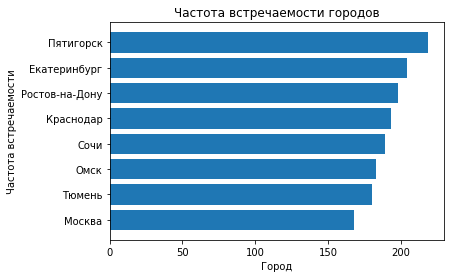

In [22]:
city_counts_sorted = city_counts.sort_values(ascending=True)
plt.barh(city_counts_sorted.index,city_counts_sorted.values)
plt.xlabel('Город')
plt.ylabel('Частота встречаемости')
plt.title('Частота встречаемости городов')
plt.show()

Исходя из таблицы и графика самый часто встречаемый город Пятигорск -219, затем Екатеринбург - 204 и Ростов-на-Дону -198, реже всего встречается Москва -168.

**3.2 Соотношение пользователей с подпиской и без подписки**

free     835
ultra    699
Name: subscription_type, dtype: int64


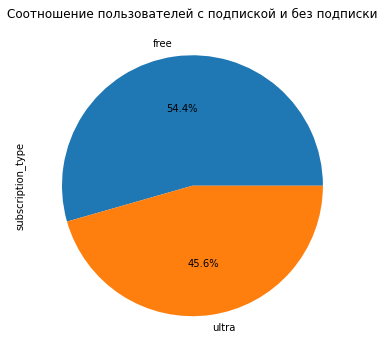

In [23]:
subscription_counts = users['subscription_type'].value_counts() #кол-во пользователей с подпиской и без
ratio_with_subscription = subscription_counts['ultra'] / len(users)#делим кол-во пользователей с подпиской/на всех
ratio_without_subscription = subscription_counts['free'] / len(users)#делим кол-во пользователей без подписки/на всех 
print(subscription_counts)
#print("Пользователей с подпиской: {:.2%}".format(ratio_with_subscription))
#print("Пользователей без подписки: {:.2%}".format(ratio_without_subscription))
users['subscription_type'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', ylabel=None)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

После построения круговой диаграммы можно сделать вывод, что пользователей **без подписки** больше, составляет **54.43%**. 

**С подпиской** пользователей  **45.47%**, разрыв составляет только 8.96% между показателями. 

**3.3 Возраст пользователей**

In [24]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

Узнаем, что средний возраст составляет 24,9, всего  1534 значений возраста, при этом минимальный возраст 12 лет, максимальный 43 года.
Можем как дополнение, разделить возраста на группы:0-18, 19-25, 26-35, 35-45, 45+. Чтобы было легче анализировать данные о возрасте и построим столбчатую диаграмму.

Частота встречаемости измененных возрастных групп:
26-35    790
19-25    637
0-18      79
35-45     28
45+        0
Name: age_group, dtype: int64


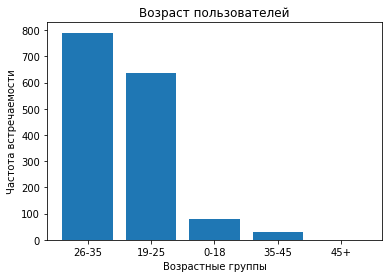

In [25]:
#создаем возрастные группы
bins = [0, 18, 25, 35, 45, float('inf')]
labels = ['0-18', '19-25', '26-35', '35-45', '45+']

#добавление столбца с  возрастными группами в датафрейм
users['age_group'] = pd.cut(users['age'], bins=bins, labels=labels, right=False)

#подсчет частоты встречаемости измененных возрастных групп
age_groups_counts = users['age_group'].value_counts()
print("Частота встречаемости измененных возрастных групп:")
print(age_groups_counts)

#cтроим стоблчатый график
plt.bar(age_groups_counts.index,age_groups_counts.values)
plt.xlabel('Возрастные группы')
plt.ylabel('Частота встречаемости')
plt.title('Возраст пользователей')
plt.show()

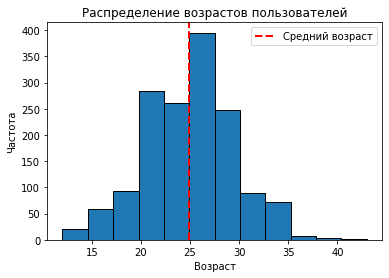

In [26]:
# cоздаем гистограмму
plt.hist(users['age'], bins=12,edgecolor='black')

# выводим средний возраст
plt.axvline(users['age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Средний возраст')
plt.legend()

plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возрастов пользователей')
plt.show()

На графике видно распределение по возрастам,левый хвост где возраст от 0 до 25 лет  больше насыщен данными, чем правый (где возраст стремится к 40 годам).   
В целом это и логично на самокатах как правило пользуется более молодое поколение.А так же виден сильный вброс на уровне примерно  23 лет.

Узнаем, что средний возраст составляет 24,9, всего 1534 значений возраста.  Самый часто встречающийся возраст 25 лет таких пользователей аж 145,  затем 132 пользователя с возрастом 24 года.При этом минимальный возраст 12 лет, максимальный 43 года.   
На графике распределения по возрастам видно, что левый хвост где возраст от 0 до 25 лет больше насыщен данными, чем правый (где возраст стремится к 40 годам).В целом это и логично на самокатах как правило пользуется более молодое поколение.А так же виден сильный вброс на уровне примерно 23 лет.  
 Как дополнение, разделили возраста на группы:0-18, 19-25, 26-35, 35-45, 45+. Наиболее больше пользователей в группе 26-35 их 790 пользователей. И только после этого идет возрастная группа 19-25 лет с кол-вом 637 пользователя.

**3.4 Расстояние, которое пользователь преодолел за одну поездку**

In [27]:
rides.head(5)

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Для начала вывели 5 строк таблицы чтобы понять какие данные у нас есть. Исходя из таблицы по столбцу distance  видим, что данные в что данные метрах.
Сгруппируем данные и выведем среднее по user id

In [28]:
average_distance_per_ride = rides.groupby('user_id')['distance'].mean().sort_values(ascending=False)
print(average_distance_per_ride/1000) #перевели в км данные

user_id
1309    4.287519
850     4.004838
644     3.939773
465     3.917559
381     3.905038
          ...   
883     2.094475
1011    2.065920
1433    1.991245
1495    1.767761
908     1.630788
Name: distance, Length: 1534, dtype: float64


In [29]:
#среднее, мин, макс без разбивки на пользователей
average_distance = rides['distance'].mean()
min_distance = rides['distance'].min()
max_distance = rides['distance'].max()


print('average_distance',average_distance/1000)
print('min_distance',min_distance/1000)
print('max_distance',max_distance/1000)

average_distance 3.0706599756818815
min_distance 0.000855682925681208
max_distance 7.211007744598519


После получения таблицы, видим что пользователь 1309 совершает в среднем самые длинные поездки в 4,2 км, при этом самая минимальная поездка составляет 1,6 км у пользователя 908. На уровне всех пользователей в среднем расстрояние занимает 3,07км, максимальная поездка составила 7,2 км.

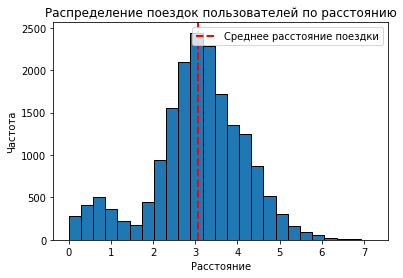

In [30]:
# cоздаем гистограмму
km_distance = rides['distance'] / 1000 #переведем в км
plt.hist(km_distance, bins=25,edgecolor='black')

# выводим среднее расстояние
plt.axvline(km_distance.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее расстояние поездки')
plt.legend()

plt.xlabel('Расстояние')
plt.ylabel('Частота')
plt.title('Распределение поездок пользователей по расстоянию')
plt.show()

Как и получили выше средняя продолжительность поездок составляет около 3,07 км, исходя из графика видим, что правый хвост по частоте распредлен равномерно к 7 км, в отличии от левой части хвоста имеется пик около 1 км, затем  идут провалы и резкий скачок к 2 км и по сравнению с правым хвост набор идет не такой равномерный 

**3.5 Продолжительность поездок**

В данном случае поступим так же, высчитаем среднее по продолжительности поездок по каждому пользователю.

In [31]:
average_duration_per_ride = rides.groupby('user_id')['duration'].mean().sort_values(ascending=False)
average_duration_per_ride

user_id
657     26.136000
643     25.839621
354     25.661979
522     25.377577
126     25.364371
          ...    
801     12.857021
1256    12.818559
1243    12.119112
73      11.385922
908     11.163431
Name: duration, Length: 1534, dtype: float64

In [32]:
average_duration = rides['duration'].mean()
max_duration = rides['duration'].max()
min_duration = rides['duration'].min()

print('average_duration',average_duration)
print('max_duration',max_duration)
print('min_duration',min_duration)

average_duration 17.80501119798444
max_duration 40.82396261922424
min_duration 0.5


Пользователь 657 тратит в среднем максимальное кол-во времени и составляет поездка  26,1 минут, а вот пользователь 908 затрачивает в среднем на поездку 11 минут. При этом среднее продолжительность времени поездок составляет 17 минут, максимальное время составляло 40 минут, а вот минимальное 30 секунд

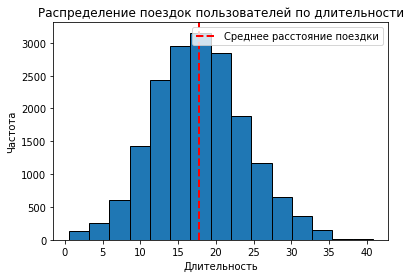

In [33]:
# cоздаем гистограмму
min_duration = rides['duration'] 
plt.hist(min_duration, bins=15,edgecolor='black')

# выводим средний возраст
plt.axvline(min_duration.mean(), color='red', linestyle='dashed', linewidth=2, label='Среднее расстояние поездки')
plt.legend()

plt.xlabel('Длительность')
plt.ylabel('Частота')
plt.title('Распределение поездок пользователей по длительности')
plt.show()


В случае длительности поездки распределены более равномерно с обеих сторон, относительно предыдущих измерений как возраст и расстояние поездок. Видим, что поездки по длительности не превышают 40 минут что илогично на такие продолжительно длинные поездки наверно лучше пользоваться общественным транспортом. Но у нас есть поездки которые меньше  500 метров. Расмотрим это дальше

#### Шаг 4. Объединение данных

**4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм.**   
Для этого воспользуйтесь методом merge()

In [34]:
first_merge = rides.merge(users, on='user_id', how='left') # первое объединение с таблицой поездок
final_df =  first_merge.merge(subscriptions, on='subscription_type', how='left') # финальная таблица с объединением данных с подписками
final_df.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,age_group,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,19-25,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,19-25,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,19-25,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,19-25,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,19-25,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,19-25,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,19-25,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,19-25,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,19-25,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,19-25,6,0,199


In [35]:
print("Количество строк и столбцов в новой таблице:", final_df.shape)

Количество строк и столбцов в новой таблице: (18068, 13)


Объединили таблицу, сверили с тем что  таблице rides было 18068 строк, в новой таблице так же и стоблцы соответствуют, значит данные не потеряли. Так же видим что столбцы из subscription так же все добавились

**4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:**  
c данными о пользователях без подписки;  
с данными о пользователях с подпиской.  

Датафрейм c данными о пользователях без подписки

In [36]:
free_users_df =  final_df[final_df['subscription_type'] == 'free']  #датафрейм без подписки
free_users_df.head(5)

,user_id,distance,duration,date,month,name,age,city,subscription_type,age_group,minute_price,start_ride_price,subscription_fee
6500,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,19-25,8,50,0
6501,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,19-25,8,50,0
6502,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,19-25,8,50,0
6503,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,19-25,8,50,0
6504,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,19-25,8,50,0


Датафрейм c данными о пользователях c подпиской

In [37]:
ultra_users_df =  final_df[final_df['subscription_type'] == 'ultra'] #датафрейм с подпиской
ultra_users_df.head(5)

,user_id,distance,duration,date,month,name,age,city,subscription_type,age_group,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,19-25,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,19-25,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,19-25,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,19-25,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,19-25,6,0,199


**4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий**

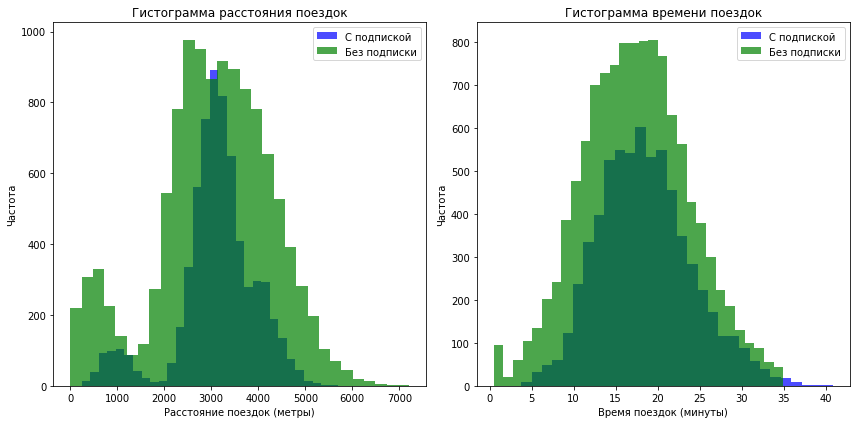

In [38]:
# Создание гистограммы для расстояния поездок
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(ultra_users_df['distance'], bins=30, color='blue', alpha=0.7, label='С подпиской')
plt.hist(free_users_df['distance'], bins=30, color='green', alpha=0.7, label='Без подписки')
plt.xlabel('Расстояние поездок (метры)')
plt.ylabel('Частота')
plt.title('Гистограмма расстояния поездок')
plt.legend()

# Создание гистограммы для времени поездок
plt.subplot(1, 2, 2)
plt.hist(ultra_users_df['duration'], bins=30, color='blue', alpha=0.7, label='С подпиской')
plt.hist(free_users_df['duration'], bins=30, color='green', alpha=0.7, label='Без подписки')
plt.xlabel('Время поездок (минуты)')
plt.ylabel('Частота')
plt.title('Гистограмма времени поездок')
plt.legend()

plt.tight_layout()
plt.show()

In [39]:
# выделение поездок продолжительностью 30 секунд в датафрейме пользователей без подписок
short_duration_trips_free = free_users_df[(free_users_df['duration'] == 0.5)] 
count_0_5_duration_free = (free_users_df['duration'] == 0.5).sum()
print("Количество значений равных 0.5 в столбце 'duration':", count_0_5_duration_free)
short_duration_trips_free.head(4)

Количество значений равных 0.5 в столбце 'duration': 95


,user_id,distance,duration,date,month,name,age,city,subscription_type,age_group,minute_price,start_ride_price,subscription_fee
6531,701,4196.445201,0.5,2021-08-31,8,Иван,31,Екатеринбург,free,26-35,8,50,0
6570,704,4830.824371,0.5,2021-10-14,10,Мирон,29,Ростов-на-Дону,free,26-35,8,50,0
6680,712,4684.004397,0.5,2021-03-04,3,Дарья,28,Москва,free,26-35,8,50,0
6695,713,5215.642710,0.5,2021-02-25,2,Святослав,30,Краснодар,free,26-35,8,50,0


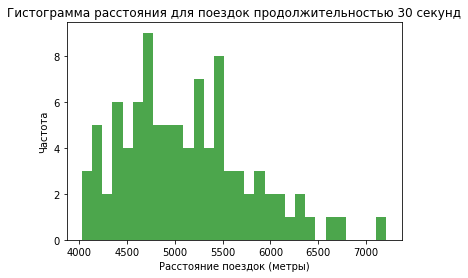

In [40]:
plt.hist(short_duration_trips_free['distance'], bins=30, color='green', alpha=0.7)
plt.xlabel('Расстояние поездок (метры)')
plt.ylabel('Частота')
plt.title('Гистограмма расстояния для поездок продолжительностью 30 секунд')
plt.show()

Исходя из этих данных получается, что  за 30 секунд есть 95 строк  при этом все данные начинаются с  *4,5 км и доходят  до  7 км* и самое главное эти данные находятся в датафрейме *пользователей без подписок*. На первый взгляд эти данные не логичные и не реалистичные и похожи на аномалии, но необходимо уточнить в связи с чем такие данные и обратиться к менеджерам проекта.
Возможно это акция как  *«бесплатные минуты»* либо что-то другое для *мотивации* приобретения подписки для пользователей без подписок. Поэтому на данном этапе предлагаю не удалять, т.к удаление повлечет за собой изменение данных в выручки 

Провал между двумя пиковыми значениями по продолжительности у *пользователей без подписки* связан с тем, что в этот промежуток пользователи переходят на такси и на данном промежутке стоимость такси и аренды самоката становятся сопоставимыми или даже близкими, и пользователи без подписки могут предпочесть такси из-за комфорта или других причин.  
И  это как раз доказывает мою теорию, т.к для *пользователей с подпиской* пик является 3 км т.к. для них как раз таки выгоднее использовать самокат чем такси.  

На обоих графиках о продолжительности и длительности возле минимальных значений, а именно в случае с пользователями без подписок есть данные. Я думаю это связано:   
1. Множество небольших поездок среди пользователей без подписки вероятно, испытывают новый сервис для себя в качетсве аренды самокатов. Возможно, эти короткие поездки представляют собой своего рода 'пробные' поездки, которые пользователи предпринимают, прежде чем принять решение о подписке. Это подтверждается отсутствием подобных значений среди пользователей с подпиской. Такие данные не являются аномалией, так как для большинства пользователей естественно опробовать новую услугу на коротком расстоянии, прежде чем сделать долгосрочное обязательство в виде подписки.
2. Не возможно использовать самокат.Причины: поломка, недоступен,низкий заряд, другие ошибки и естественно пользователь сам передумал использовать самокат.  
Я не считаю такие данные аномалией.

Данные без подписки в двух графиках гораздо более "размыты" чем с подпиской.  Встречаются даже значения около 0, получается есть последствия большой дисперсии, то есть большого разброса данных вокруг среднего в данных без подписок
Исходя из графиков можно сделать следующие выводы:  
В случае *расстрояний*  без подписок поездки намного длинее достигают 7 км и имеют более большой размах и чаще встречаются, в случае с подпиской  максимальное растроение не доходит 6 км, встречается реже.  
В случае *длительности*  без подписок поездки как и в расстоянии встрчаются чаще при этом не привышают 35 мин, а в случае подписок максимальная дительность достигает  40 мин и как с расстрояним встречается реже.  

#### Шаг 5. Подсчёт выручки

**5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4**  
Найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.   
Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.

In [41]:
final_df['duration'] = np.ceil(final_df['duration'])# каждое значение из столбца duration округляется с помощью «потолка»

# группировка по пользователям, месяцам и агрегация данных
full_df = final_df.groupby(['user_id','month']) \
                        .agg({'distance': 'sum', 'duration': ['sum', 'count'], 
                              'subscription_type': 'first',
                              'minute_price': 'first', 'start_ride_price': 'first',
                              'subscription_fee': 'first'}) \
                        .reset_index()

# переименование столбцов
full_df.columns = ['user_id', 'month', 'sum_distance', 'sum_duration', 
                         'trips_count', 'subscription_type', 
                         'minute_price', 'start_ride_price', 'subscription_fee']
full_df.head(5)

,user_id,month,sum_distance,sum_duration,trips_count,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,42.0,2,ultra,6,0,199
1,1,4,754.159807,7.0,1,ultra,6,0,199
2,1,8,6723.470560,46.0,2,ultra,6,0,199
3,1,10,5809.911100,32.0,2,ultra,6,0,199
4,1,11,7003.499363,56.0,3,ultra,6,0,199


In [42]:
print("Количество строк и столбцов в full_df:", full_df.shape)

Количество строк и столбцов в full_df: (11331, 9)


**5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь.**  
Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.  

Помесячная выручка считается по формуле: (стоимость старта поездки ×  количество поездок) + стоимость одной минуты поездки ×
общая продолжительность всех поездок в минутах) + стоимость подписки

In [43]:
# вычисление выручки для каждого пользователя в каждом месяце
full_df['revenue'] =  ((full_df['start_ride_price'] * full_df['trips_count'] ) +\
                      full_df['minute_price'] * full_df['sum_duration'])+full_df['subscription_fee']
full_df.head(5)

,user_id,month,sum_distance,sum_duration,trips_count,subscription_type,minute_price,start_ride_price,subscription_fee,revenue
0,1,1,7027.511294,42.0,2,ultra,6,0,199,451.0
1,1,4,754.159807,7.0,1,ultra,6,0,199,241.0
2,1,8,6723.470560,46.0,2,ultra,6,0,199,475.0
3,1,10,5809.911100,32.0,2,ultra,6,0,199,391.0
4,1,11,7003.499363,56.0,3,ultra,6,0,199,535.0


In [44]:
print("Количество строк и столбцов в full_df:", full_df.shape)

Количество строк и столбцов в full_df: (11331, 10)


Проверили после добавления столбца стало их 10, кол-во строк не изменилось. Все верно

#### Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки?**  
Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.  
Обратите внимание, что мы используем alternative='greater', так как нас интересует вопрос, тратят ли пользователи с подпиской больше времени на поездки.

Сформулируем нулевую и альтернативную гипотезы:  
**Нулевая гипотеза (H0)**: Продолжительность поездок для пользователей с подпиской **не отличается** от продолжительности поездок для пользователей без подписки.

**Альтернативная гипотеза (H1)**: Продолжительность поездок для пользователей с подпиской **больше** чем продолжительность поездок для пользователей без подписки

In [45]:
ultra_users_duration = ultra_users_df['duration']  # длительность поездок с подпиской
free_users_duration = free_users_df['duration']  # длительность поездок без подписки

alpha = 0.05  # уровень статистической значимости

# проверка гипотезы
results = st.ttest_ind(ultra_users_duration, free_users_duration, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергать нулевую гипотезу')


p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


Получили p-значение: 1.2804098316645613e-34 (очень близкое к нулю). Отвергаем нулевую гипотезу. Это свидетельствует о том, что у нас есть статистически значимые доказательства в пользу того, что продолжительность поездок для пользователей с подпиской больше, чем для пользователей без подписки


**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**  
Необходимо проверить гипотезу и сделать выводы.  

Сформулируем нулевую и альтернативную гипотезы:  
**Нулевая гипотеза (H0)**: Расстояние, которое проезжают пользователи с подпиской за одну поездку, **не превышает** 3130 метров.

**Альтернативная гипотеза (H1)**: Расстояние, которое проезжают пользователи с подпиской за одну поездку, **превышает** 3130 метров.



In [46]:
ultra_users_distance = ultra_users_df['distance'] # пользователи с подпиской по расстоянию

alpha = 0.05 # уровень статистической значимости

check_distance = 3130.0 # Заданное значение расстояния

results_distance = st.ttest_1samp(ultra_users_distance, check_distance, alternative='greater')

print("P-значение:", results_distance.pvalue)

if results_distance.pvalue < alpha:
    print(f"Отвергаем нулевую гипотезу.")
else:
    print(f'Нет оснований отвергать нулевую гипотезу')

P-значение: 0.9195368847849785
Нет оснований отвергать нулевую гипотезу


P-value (0.9195368847849785) больше уровня значимости alpha (0.05) Это означает, что результаты не являются статистически значимыми для отвержения нулевой гипотезы, и мы не имеем оснований считать, что среднее расстояние превышает 3130 метров

**6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**  
Сформулируем гипотезы:  
**Нулевая гипотеза (H0)**: Средняя помесячная выручка от пользователей с подпиской равна средней помесячной выручки от пользователей без подписки.  

**Альтернативная гипотеза (H1)**: Средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки.  

In [47]:
ultra_subscription_revenue = full_df[full_df['subscription_type'] == 'ultra']['revenue']
#выручка поездок c подпиской
free_subscription_revenue = full_df[full_df['subscription_type'] == 'free']['revenue']
#выручка поездок без подписки

alpha = 0.05 # уровень статистической значимости

results_revenue = st.ttest_ind(ultra_subscription_revenue, free_subscription_revenue,alternative='greater')

print('p-значение:', results_revenue.pvalue)

if results_revenue.pvalue < alpha:
    print("Отвергаем нулевую гипотезу.")
else:
    print("Нет оснований отвергать нулевую гипотезу.") 

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу.


В данном случае, p-значении равно 1.8850394384715216e-31 и меньше уровня статистической значимости (alpha 0,05), тогда мы отвергаем нулевую гипотезу. Это указывает на то, что имеем основание считать, ччто средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки.

**6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**

Можно провести **проверку двусторонней гипотезы**.    
В парном тесте основной вопрос заключается в том, есть ли статистически значимое различие между средними значениями двух связанных групп до обновления и после обновления.  
Формулировка гипотез:  
**Нулевая гипотеза (H0): Средние значения количества обращений до обновления и после обновления равны (то есть, обновление не оказало влияния на количество обращений в техподдержку).**   
 **Альтернативная гипотеза (H1): Среднее количество обращений после обновления меньше, чем среднее количество обращений до обновления (то есть, обновление привело к снижению числа обращений).**  
При анализе результатов парного двусторонней гипотезы, если p-значение меньше выбранного уровня статистической значимости (обычно 0.05), то отвергается нулевая гипотеза, и мы можем считать, что существует статистически значимое различие между средними значениями групп.
Для расчета в библиотеке scipy.stats этот тест реализован функцией ttest_rel , можно будет создать до  обновления и после обновления даатфреймы, например так results = stats.ttest_rel(before_update, after_update, aternative='greater')

#### Выводы

Проанализировали сервис аренды самокатов **GoFast** с помощью трех датафреймов по пользователям, поездкам и типам подписок.  
Проверели и обработали данные на наличие пропущенных значений и дубликатов в датафреймах, а именно: создали новй столбец с месяцами,удалили 31 дубликат из датафрейма users, в итоге объединили данные о пользователях, поездках и подписках в один датафрейм.  Провели Исследовательский анализ данных согласно условиям,а так же проверили гипотезы.  
**Можно сделать следующие выводы:**       
  1.Самый часто встречаемый городом является Пятигорск встретился 219 раз, затем Екатеринбург 204 раз и Ростов-на-Дону, реже всего встречается Москва 168 раз.  
 2.Пользователей с подпиской: **45.57%**  
Пользователей без подписки: **54.43%**, разрыв составляет только 8.96% между показателями.    
 3.Средний возраст пользователей составляет 24,9 лет. При этом самый часто встречающийся возраст 25 лет таких пользователей аж 145, затем 132 пользователя с возрастом 24 года. Было решено разделить возраста на группы, построив график, определили что наиболее больше пользователей в группе 26-35 их 790 пользователей. И только после этого идет возрастная группа 19-25 лет с кол-вом 637 пользователя. За 45+ нет ни одного пользователя, так же в данных есть 4 самых молодых пользователей им по 12 лет.Самому взрослому пользователю 43 года.  
 4.Исследовали расстояние, которое пользователь преодолел за одну поездку, после получения таблицы, видим что пользователь 1309 совершает в среднем самые длинные поездки в 4,2 км, при этом самая минимальная поездка составляет 1,6 км у пользователя 908. На уровне всех пользователей в среднем расстрояние занимает 3,07км, максимальная поездка составила 7,2 км. 
 5.Самая длинная продолжительность поездок у Пользователя 657 в среднем 26,1 минут, пользователь 908 затрачивает в среднем на поездку 11 минут. При этом среднее продолжительность времени поездок составляет 17 минут, максимальное время составляло 40 минут, а вот минимальное 30 секунд.  
 6.Создали датафреймы с подпиской и без подписок, для сравнения расстояний и времени поездок для пользователей обеих категорий. 
В случае расстрояний: *без подписок* поездки намного длинее достигают 7 км и имеют более большой размах и чаще встречаются, *в случае с подпиской* максимальное растроение не доходит 6 км, встречается реже.
В случае длительности: *без подписок* поездки как и в расстоянии встречаются чаще при этом не превышают 35 мин, а *в случае подписок* максимальная дительность достигает 40 мин и как с расстрояним встречается реже.   При этом исследовали аномалии и пришли к следующим выводам:  
6.1провал между двумя пиковыми значениями по продолжительности у пользователей без подписки связан с тем, что в этот промежуток пользователи переходят на такси и на данном промежутке стоимость такси и аренды самоката становятся сопоставимыми или даже близкими, и пользователи без подписки могут предпочесть такси из-за комфорта или других причин.
И это как раз доказывает мою теорию, т.к для пользователей с подпиской пик является 3 км т.к. для них как раз таки выгоднее использовать самокат чем такси.  
6.2.На обоих графиках о продолжительности и длительности возле минимальных значений, а именно в случае с пользователями без подписок есть данные. Возможно это связано: Множество небольших поездок среди пользователей без подписки вероятно, испытывают новый сервис для себя в качетсве аренды самокатов. Возможно, эти короткие поездки представляют собой своего рода 'пробные' поездки, которые пользователи предпринимают, прежде чем принять решение о подписке. Это подтверждается отсутствием подобных значений среди пользователей с подпиской. Такие данные не являются аномалией, так как для большинства пользователей естественно опробовать новую услугу на коротком расстоянии, прежде чем сделать долгосрочное обязательство в виде подписки.  
6.3.Следует не забывать, что иногда  невозможно использовать самокат.Причины: поломка, недоступен,низкий заряд, другие ошибки и естественно пользователь сам передумал использовать самокат.   
 6.4. В данных есть  95 строк по пользователям без подписок у которых длительность составляет меньше 30 секунд,но при этом поездка составляет от 4 до 7 км,  возможно  это акция как «бесплатные минуты» либо что-то другое для мотивации приобретения подписки для пользователей без подписок(требует обратной связи от поставщиков данных). Эти данные не были удалены.   
 7.Добавили данные о выручке для того чтобы проверить следующие гипотезы:  
 -**Важно понять, тратят ли пользователи с подпиской больше времени на поездки?**  
*Нулевая гипотеза (H0)*: Продолжительность поездок для пользователей с подпиской не отличается от продолжительности поездок для пользователей без подписки.  
*Альтернативная гипотеза (H1)*: Продолжительность поездок для пользователей с подпиской меньше чем продолжительность поездок для пользователей без подписки.  
    Получили p-значение: 1.2804098316645613e-34 (очень близкое к нулю). Отвергаем нулевую гипотезу. Это свидетельствует о том, что у нас есть статистически значимые доказательства в пользу того, что продолжительность поездок для пользователей с подпиской больше, чем для пользователей без подписки.   
 -**Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?**   
 *Нулевая гипотеза (H0)*: Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.  
*Альтернативная гипотеза (H1)*: Расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.  
 P-value равен 0.9195368847849785 и больше уровня значимости alpha (0.05) Это означает, что результаты не являются статистически значимыми для отвержения нулевой гипотезы, и мы не имеем оснований считать, что среднее расстояние превышает 3130 метров.  
 -**Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки**   
*Нулевая гипотеза (H0)*: Средняя помесячная выручка от пользователей с подпиской равна средней помесячной выручки от пользователей без подписки.  
*Альтернативная гипотеза (H1)*: Средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки.  
В данном случае, p-значении равно 1.8850394384715216e-31 и меньше уровня статистической значимости (alpha 0,05), тогда мы отвергаем нулевую гипотезу. Это указывает на то, что имеем основание считать, что средняя помесячная выручка от пользователей с подпиской выше, чем средняя помесячная выручка от пользователей без подписки.  
-**Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось.Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?**    
Можно провести проверку двусторонней гипотезы. В парном тесте основной вопрос заключается в том, есть ли статистически значимое различие между средними значениями двух связанных групп до обновления и после обновления.
Формулировка гипотез:
*Нулевая гипотеза (H0)*: Средние значения количества обращений до обновления и после обновления равны (то есть, обновление не оказало влияния на количество обращений в техподдержку).
*Альтернативная гипотеза (H1)*: Среднее количество обращений после обновления меньше, чем среднее количество обращений до обновления (то есть, обновление привело к снижению числа обращений).
При анализе результатов парного двусторонней гипотезы, если p-значение меньше выбранного уровня статистической значимости (обычно 0.05), то отвергается нулевая гипотеза, и мы можем считать, что существует статистически значимое различие между средними значениями групп. Для расчета в библиотеке scipy.stats этот тест реализован функцией ttest_rel , можно будет создать до обновления и после обновления даатфреймы, например так results = stats.ttest_rel(before_update, after_update, aternative='greater')